# 3D model of the bridge

/Users/emilneby/miniforge3/envs/master/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


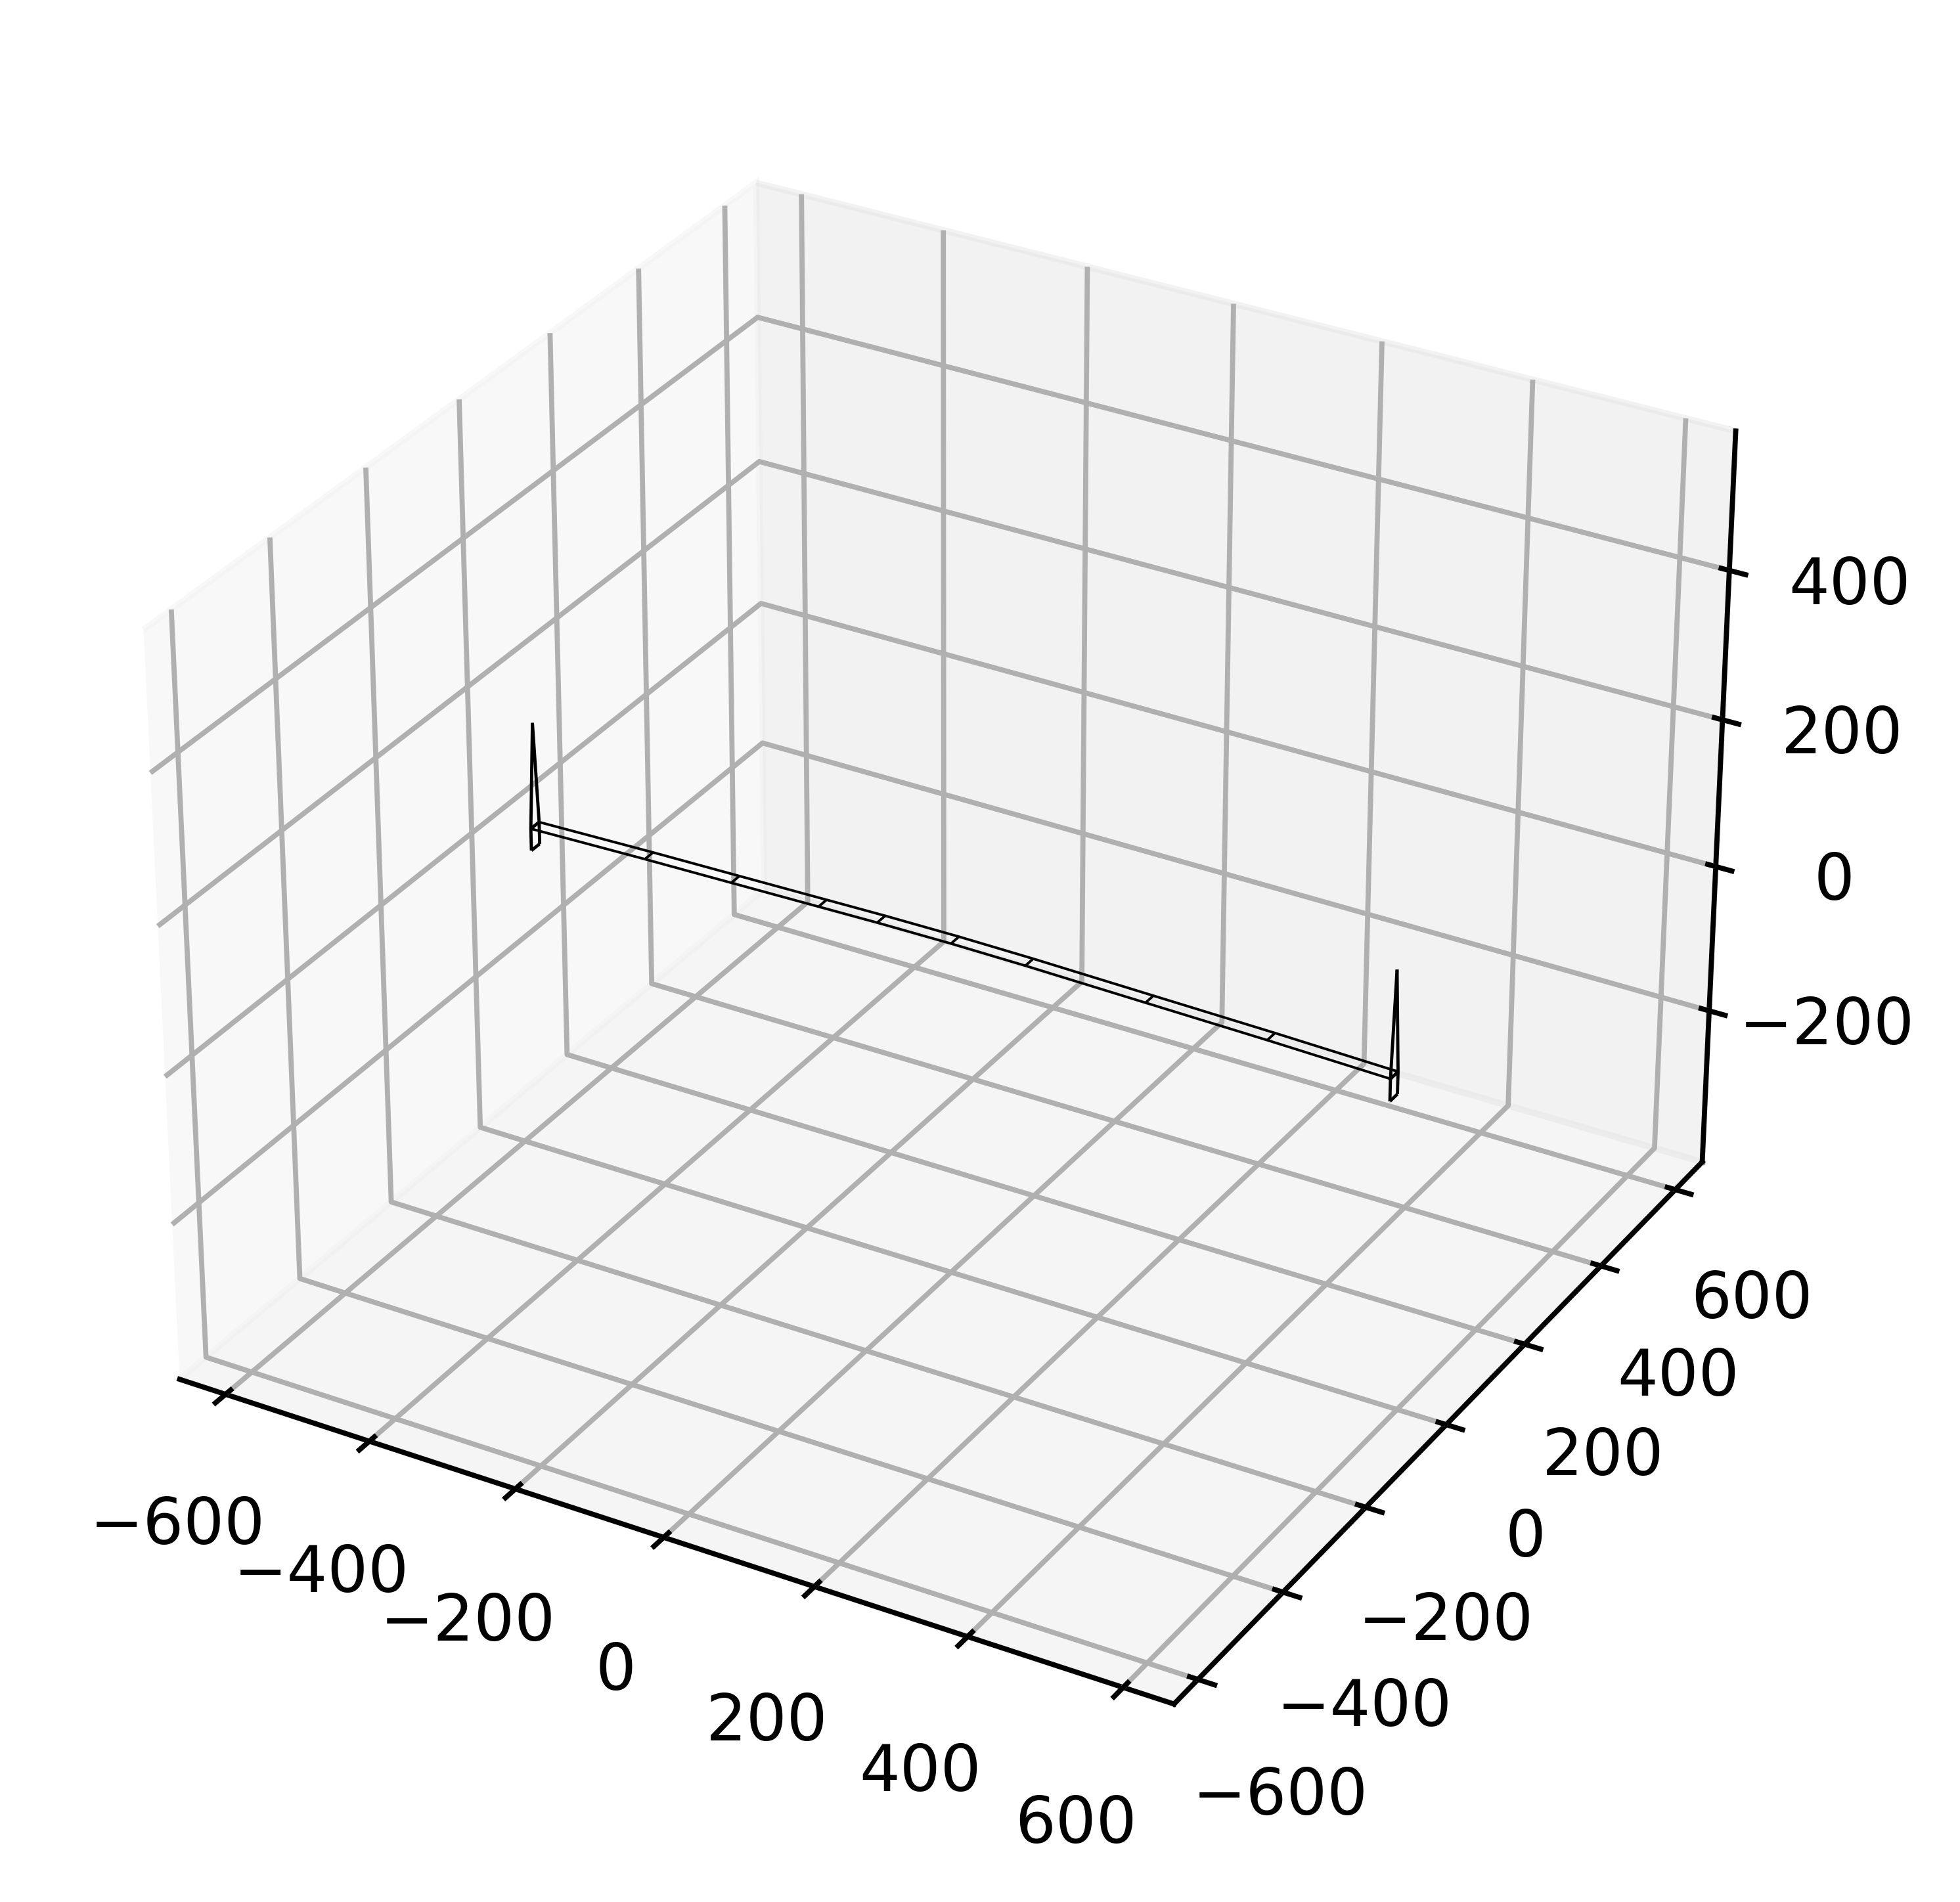

In [1]:

import numpy as np
from dataloader_halogaland.plot import BridgeModelHalogaland
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d



model = BridgeModelHalogaland()
fig = model.get_figure()
fig.savefig('3d_model.jpg')

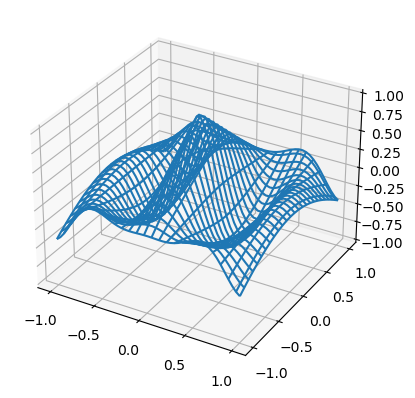

Average FPS: 342.481069


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import time


fig = plt.figure()
ax = fig.add_subplot(projection='3d')

# Make the X, Y meshgrid.
xs = np.linspace(-1, 1, 50)
ys = np.linspace(-1, 1, 50)
X, Y = np.meshgrid(xs, ys)

# Set the z axis limits, so they aren't recalculated each frame.
ax.set_zlim(-1, 1)

# Begin plotting.
wframe = None
tstart = time.time()
for phi in np.linspace(0, 180. / np.pi, 100):
    # If a line collection is already remove it before drawing.
    if wframe:
        wframe.remove()
    # Generate data.
    Z = np.cos(2 * np.pi * X + phi) * (1 - np.hypot(X, Y))
    # Plot the new wireframe and pause briefly before continuing.
    wframe = ax.plot_wireframe(X, Y, Z, rstride=2, cstride=2)
    plt.pause(.001)

print('Average FPS: %f' % (100 / (time.time() - tstart)))

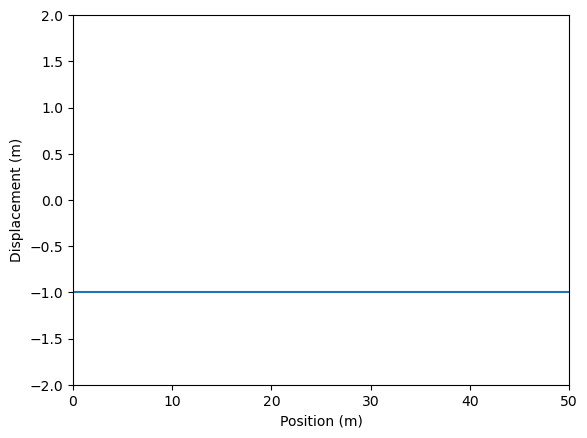

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Constants
g = 9.81  # acceleration due to gravity
L = 50.0  # length of the bridge (m)
m = 1000.0  # mass of the bridge (kg)
c = 10.0  # damping coefficient (N s/m)
k = 1000.0  # spring constant (N/m)
dt = 0.01  # time step (s)
t = np.arange(0, 20, dt)  # time array

# Initial conditions
x0 = np.zeros(2)  # initial displacement and velocity
x0[0] = 1.0  # initial displacement of the bridge

# Function to calculate the acceleration of the bridge
def acceleration(x, t):
    return np.array([x[1], -g - (c/m)*x[1] - (k/m)*x[0]])

# Function to perform numerical integration using the Euler method
def integrate(x0, t):
    x = np.zeros((len(t), len(x0)))
    x[0] = x0
    for i in range(1, len(t)):
        x[i] = x[i-1] + dt*acceleration(x[i-1], t[i-1])
    return x

# Calculate the motion of the bridge
x = integrate(x0, t)

# Create a figure and axes for the animation
fig, ax = plt.subplots()

# Plot the initial position of the bridge
line, = ax.plot([0, L], [0, -x[0,0]])

# Function to update the position of the bridge in the animation
def update(i):
    line.set_ydata(-x[i,0])
    return line,

# Create the animation
ani = animation.FuncAnimation(fig, update, frames=len(t), interval=50, blit=True, repeat=True)

# Set the axis limits and labels
ax.set_xlim(0, L)
ax.set_ylim(-2, 2)
ax.set_xlabel('Position (m)')
ax.set_ylabel('Displacement (m)')

# Display the animation
plt.show()